In [1]:
Roteiro Mineracao de Dados

SyntaxError: ignored

In [ ]:
Importacao das Li

## Importacao das Libs Python




In [5]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from sklearn.metrics import max_error
from sklearn import linear_model
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter


In [13]:
# Vamos criar um dataframe a partir de uma api em json com os dados da covid na Itália
# O comando head(10) lista as primeiras 10 linhas do dataframe
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json'
req = requests.get(url)
if req.status_code == requests.codes.ok:content = json.loads(req.text)
df = pd.DataFrame.from_dict(content,orient='columns')
df.head(10)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    466 non-null    object 
 1   stato                                   466 non-null    object 
 2   ricoverati_con_sintomi                  466 non-null    int64  
 3   terapia_intensiva                       466 non-null    int64  
 4   totale_ospedalizzati                    466 non-null    int64  
 5   isolamento_domiciliare                  466 non-null    int64  
 6   totale_positivi                         466 non-null    int64  
 7   variazione_totale_positivi              466 non-null    int64  
 8   nuovi_positivi                          466 non-null    int64  
 9   dimessi_guariti                         466 non-null    int64  
 10  deceduti                                466 non-null    int64 

In [19]:
# Iremos renomear as colunas para ficar mais intuitivo aidentificação das colunas
# Foi criado uma variável columns com o nome das novas colunas

columns =['Data','Estado','Hospitalizado_Sintoma','Terapia_Intensiva','Total_Hospitalizado','Isolado_Domiciliar','Total_Positivos','Variacao_Total_Positivo','Novos_Positivos','Curados','Falecidos','casi_da_sospetto_diagnostico','casi_da_screening','Total_Casos','Teste_Medico','Casos_Testados','note_it','ingressi_terapia_intensiva','note_test','note_casi','totale_positivi_test_molecolare','totale_positivi_test_antigenico_rapido','tamponi_test_molecolare','tamponi_test_antigenico_rapido']

df.columns = columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Data                                    466 non-null    object 
 1   Estado                                  466 non-null    object 
 2   Hospitalizado_Sintoma                   466 non-null    int64  
 3   Terapia_Intensiva                       466 non-null    int64  
 4   Total_Hospitalizado                     466 non-null    int64  
 5   Isolado_Domiciliar                      466 non-null    int64  
 6   Total_Positivos                         466 non-null    int64  
 7   Variacao_Total_Positivo                 466 non-null    int64  
 8   Novos_Positivos                         466 non-null    int64  
 9   Curados                                 466 non-null    int64  
 10  Falecidos                               466 non-null    int64 

In [22]:
# O próximo passo é calcular o aumento diário de mortes e testes médicos realizados desde o início da COVID
# Iremos utilizar as colunas Falecidos e Teste_Medico para essa etapa
# Foram criadas duas novas colunas no dataframe diff_Falecidos ediff_Teste_Medico
df['diff_Falecidos'] = df['Falecidos'].diff()
df['diff_Teste_Medico'] = df['Teste_Medico'].diff()
dates = df['Data']
date_format = [pd.to_datetime(d) for d in dates]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Data                                    466 non-null    object 
 1   Estado                                  466 non-null    object 
 2   Hospitalizado_Sintoma                   466 non-null    int64  
 3   Terapia_Intensiva                       466 non-null    int64  
 4   Total_Hospitalizado                     466 non-null    int64  
 5   Isolado_Domiciliar                      466 non-null    int64  
 6   Total_Positivos                         466 non-null    int64  
 7   Variacao_Total_Positivo                 466 non-null    int64  
 8   Novos_Positivos                         466 non-null    int64  
 9   Curados                                 466 non-null    int64  
 10  Falecidos                               466 non-null    int64 

In [23]:
df.head(5)

,Data,Estado,Hospitalizado_Sintoma,Terapia_Intensiva,Total_Hospitalizado,Isolado_Domiciliar,Total_Positivos,Variacao_Total_Positivo,Novos_Positivos,Curados,Falecidos,casi_da_sospetto_diagnostico,casi_da_screening,Total_Casos,Teste_Medico,Casos_Testados,note_it,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,diff_Falecidos,diff_Teste_Medico
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,3.0,4299.0
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,2.0,964.0
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,5.0,2427.0
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,4.0,3681.0


In [27]:
# A função describe() retorna informações estatística das colunas com tipo de dados numérico.
# A linha STD é o desvio padrão que serve para dizer o quanto os valores dos quais se extraiu a média são próximos ou distantes da própria média
df[['Hospitalizado_Sintoma','Terapia_Intensiva','Total_Hospitalizado' ,'Isolado_Domiciliar','Total_Positivos','Variacao_Total_Positivo','Novos_Positivos','Curados','Falecidos','Total_Casos','Teste_Medico']].describe()

,Hospitalizado_Sintoma,Terapia_Intensiva,Total_Hospitalizado,Isolado_Domiciliar,Total_Positivos,Variacao_Total_Positivo,Novos_Positivos,Curados,Falecidos,Total_Casos,Teste_Medico
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,4.660000e+02,4.660000e+02
mean,14734.772532,1715.572961,16450.347639,249634.270386,266084.615880,440.645923,9053.665236,1.088348e+06,57149.864807,1.411583e+06,2.112397e+07
std,10815.927897,1332.162459,12121.316062,241080.582128,250962.471356,7350.585766,9526.250342,1.254992e+06,36725.389988,1.452233e+06,1.998964e+07
min,101.000000,26.000000,127.000000,94.000000,221.000000,-27010.000000,78.000000,1.000000e+00,7.000000,2.290000e+02,4.324000e+03
25%,3047.250000,247.500000,3286.750000,28452.500000,34024.250000,-3090.250000,977.250000,1.820435e+05,34573.250000,2.381880e+05,4.902784e+06
50%,16845.000000,1974.000000,18707.500000,85044.000000,107740.000000,7.500000,4797.000000,2.430465e+05,36267.500000,3.691330e+05,1.283880e+07
75%,23660.500000,2777.000000,26474.250000,474433.250000,499047.000000,1639.750000,15185.750000,2.115596e+06,91205.500000,2.633828e+06,3.431103e+07
max,34697.000000,4068.000000,38507.000000,767867.000000,805947.000000,33418.000000,40902.000000,3.893259e+06,126342.000000,4.225163e+06,6.671798e+07


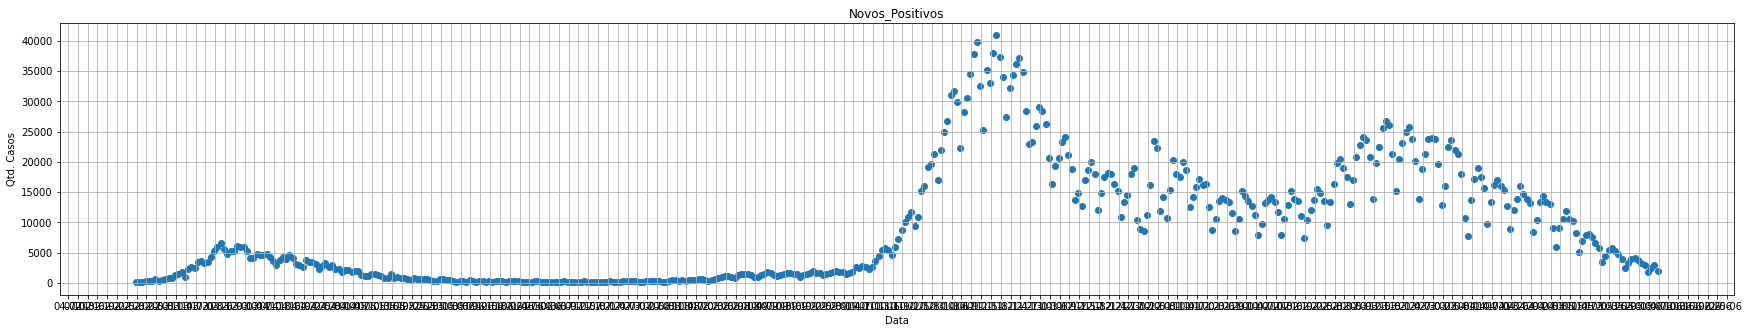

In [28]:
# Essa etapa cria o primeiro gráfico de dispersão com as informações dos novos casos de COVID

variable = 'Novos_Positivos'
fig, ax = plt.subplots(figsize=(30, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Data",ylabel='Qtd. Casos',title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
plt.show()

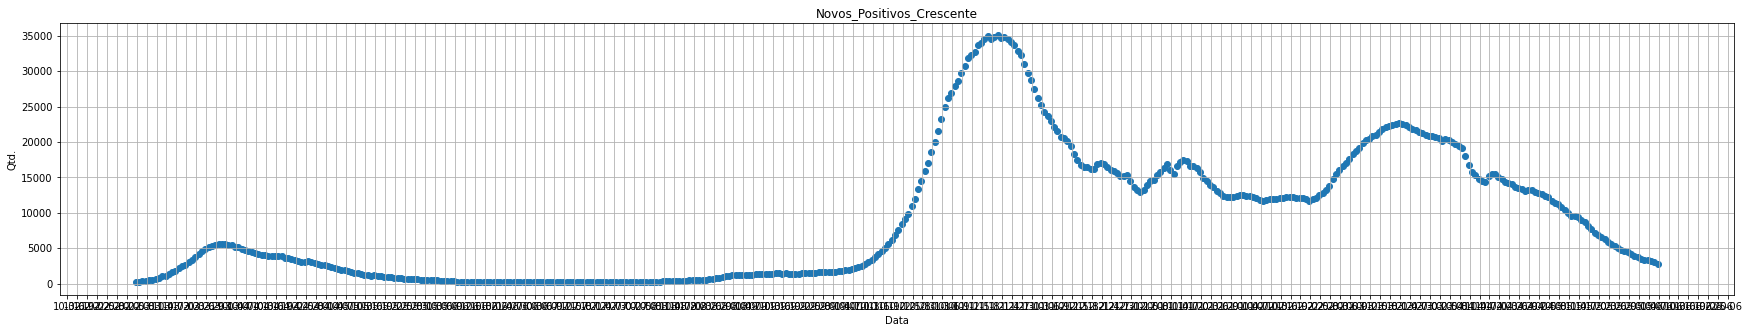

In [30]:
# Essa etapa consiste no cálculo da média móvel, que normalmente é usada para analisar séries temporais,
# calculando médias de diferentes subconjuntos do conjunto de dados completo, em nosso caso 7 dias.
# a média móvel reduz anomalias, como por exemplo, o viés de final de semana
# Nessa etapa foi criada uma nova coluna chamada Novos_Positivos_Crescendo para essa média móvel
days = 7 # dias de semana
df['Novos_Positivos_Crescente'] = df['Novos_Positivos'].rolling(window=days).mean()
variable = 'Novos_Positivos_Crescente'
fig, ax = plt.subplots(figsize=(30, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Data",ylabel='Qtd.',title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
plt.show()

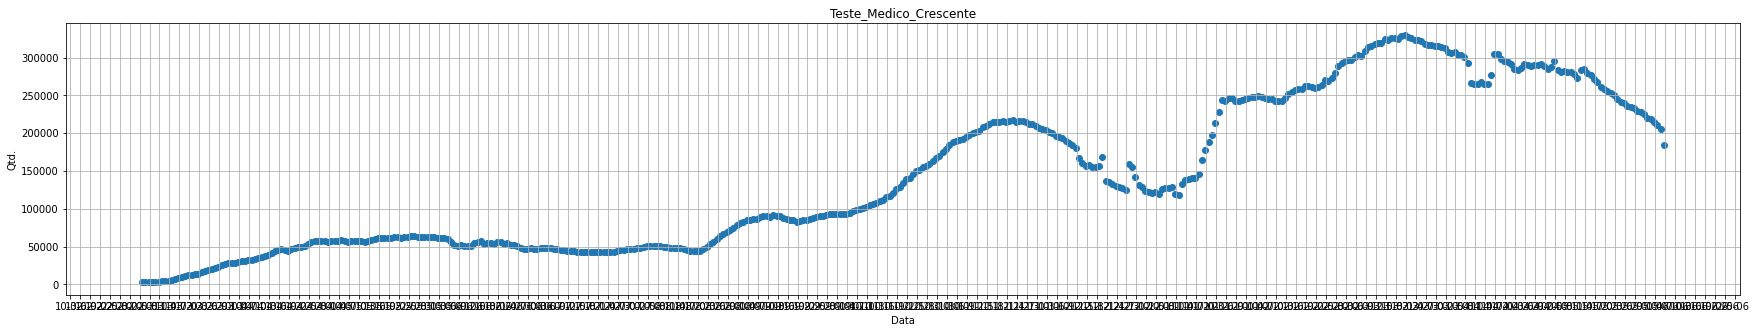

In [31]:
# Essa etapa consiste no cálculo da média móvel, que normalmente é usada para analisar séries temporais,
# calculando médias de diferentes subconjuntos do conjunto de dados completo, em nosso caso 7 dias.
# a média móvel reduz anomalias e pegamos 7 dias para considerar o fim de semana
# Nessa etapa foi criada uma nova coluna chamada Teste_Medico_Crescente para essa média móvel
df['Teste_Medico_Crescente'] = df['Teste_Medico'].diff().rolling(window=days).mean()
variable = 'Teste_Medico_Crescente'
fig, ax = plt.subplots(figsize=(30, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Data",ylabel='Qtd.',title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
plt.show()

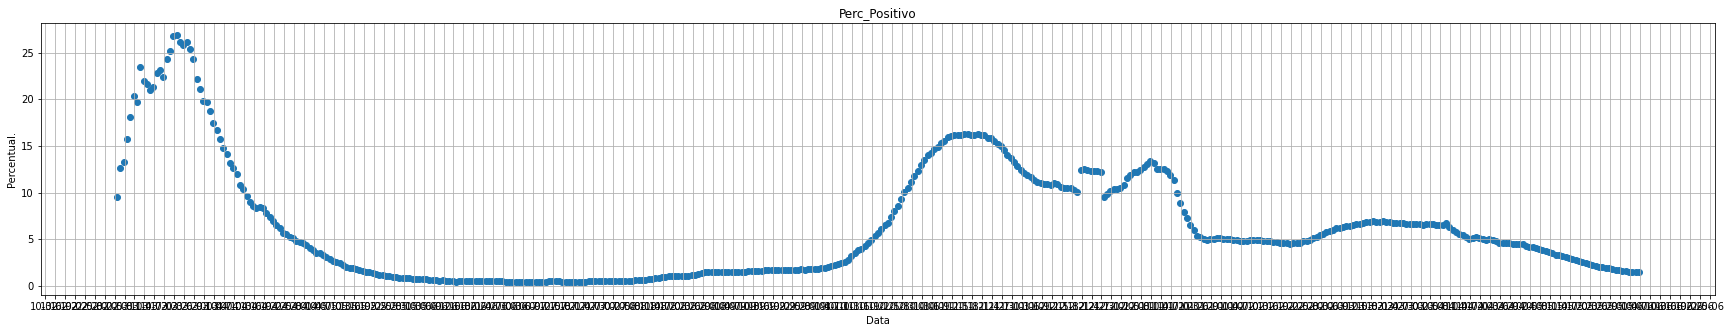

In [32]:
# Percentual de Novos Positivos Crescentes sobre Testes Diários Crescentes.
# Nesta etapa foi criada uma nova coluna no dataframe com o nome Perc_Positivo
# Podemos ver que no início houveram muitos casos e poucos testes realizados, ao contrário do mostrado atualmente onde
# temos menos de 1000 casos para quase 60 mil testes aplicados diariamente
df['Perc_Positivo'] = ((df['Novos_Positivos_Crescente'])/(df['Teste_Medico_Crescente'])*100)
variable = 'Perc_Positivo'
fig, ax = plt.subplots(figsize=(30, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Data",ylabel='Percentual.',title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
plt.show()

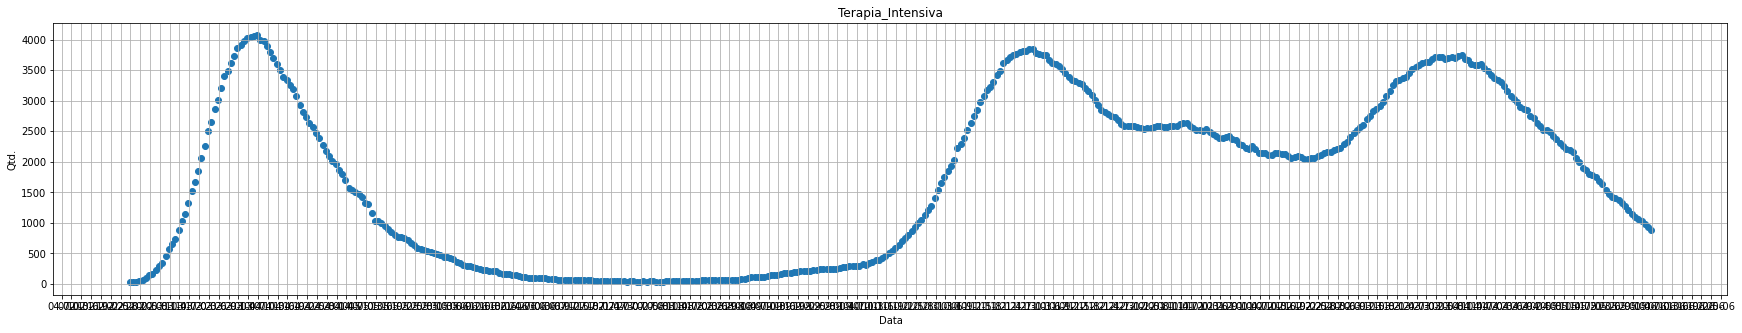

In [33]:
# A informação de terapia intensiva é outro dado importante que podemos analisar, uma vez que,
# o percentual de positivo não foi suficiente para nossa análise
variable = 'Terapia_Intensiva'
fig, ax = plt.subplots(figsize=(30, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Data",ylabel='Qtd.',title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
plt.show()

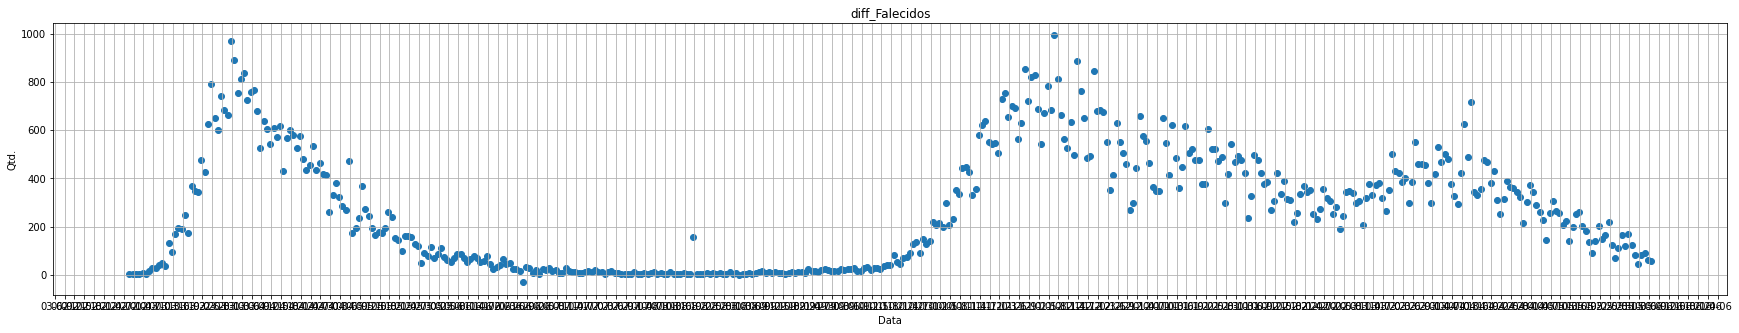

In [34]:
# Iremos analisar nessa etapa a coluna Diff_Falecidos que foi criada anteriormente que mostra
# o aumento diário das mortes.
variable = 'diff_Falecidos'
fig, ax = plt.subplots(figsize=(30, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Data",ylabel='Qtd.',title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
plt.show()

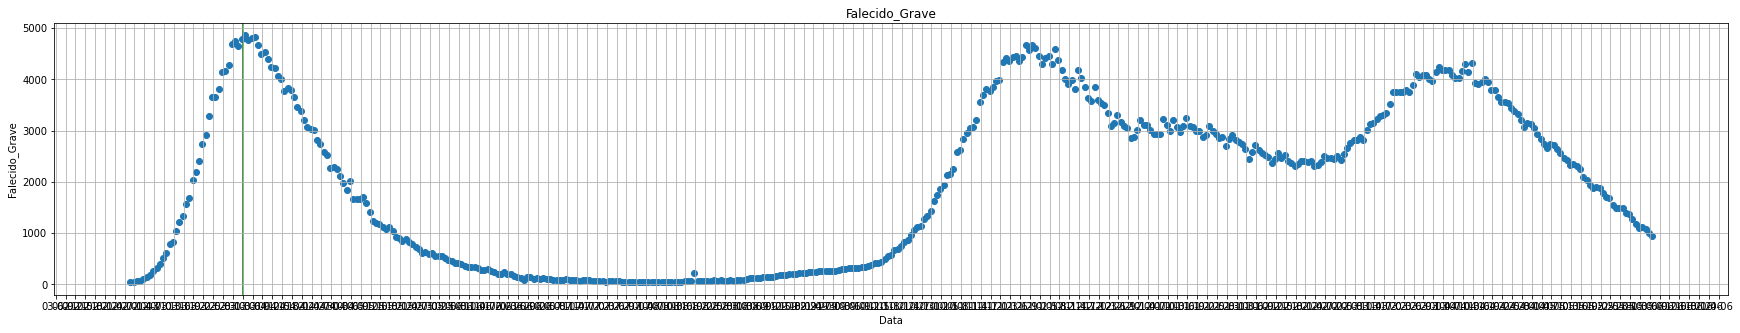

In [36]:
# Nessa etapa criamos uma nova coluna no dataframe chamada Falecido_Grave
# O valor combinado de Falecido diário com a Terapia Intensiva é uma variável confiável
# para estimar a progressão atual da epidemia e modelar tendênciasfuturas
df['Falecido_Grave'] = df['diff_Falecidos'] + df['Terapia_Intensiva']
variable = 'Falecido_Grave'
fig, ax = plt.subplots(figsize=(30, 5))
ax.grid()
ax.scatter(date_format,df[variable])
ax.set(xlabel="Data",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
ax.axvline(datetime(2020, 3, 31), c="green", zorder=0)
plt.show()

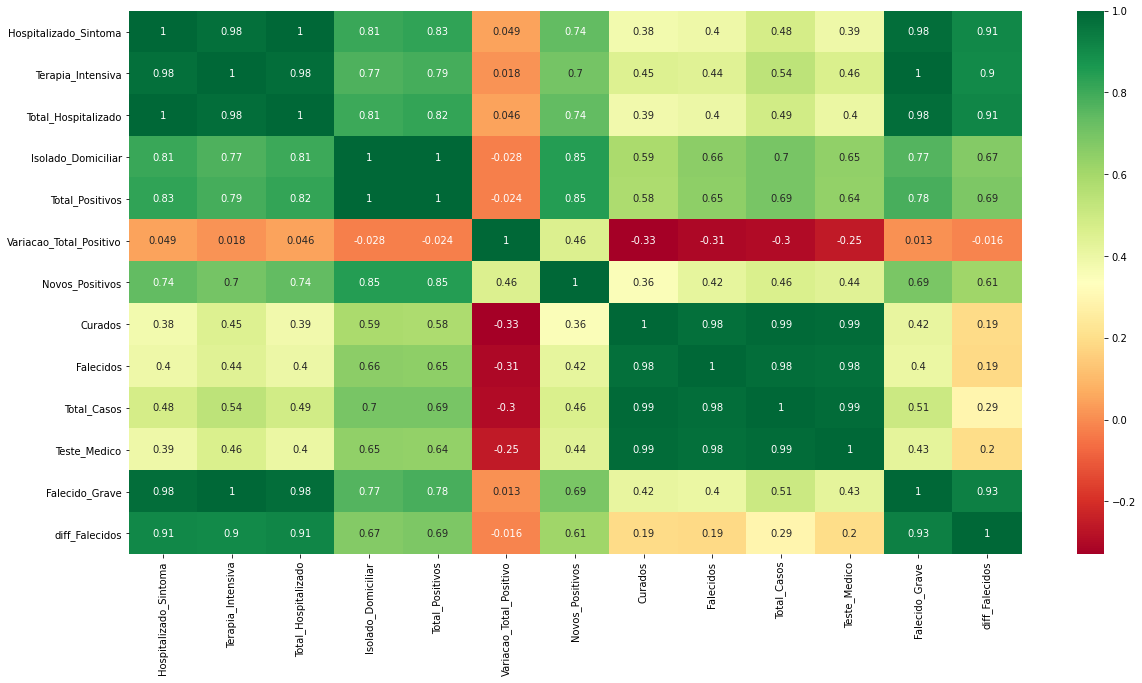

In [39]:
# Correlação dos dados
# Podemos ver que existe forte correlação entre Terapia Intensiva e Diff_Falecidos
import seaborn as sns

df_corr = df[['Hospitalizado_Sintoma','Terapia_Intensiva','Total_Hospitalizado','Isolado_Domiciliar','Total_Positivos','Variacao_Total_Positivo','Novos_Positivos','Curados','Falecidos','Total_Casos','Teste_Medico','Falecido_Grave','diff_Falecidos']].copy()
corr = df_corr.corr()
top_corr = corr.index
plt.figure(figsize=(20,10))
g = sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')

In [40]:
# Vamos adicionar o valor 36 para a variável starting_date porque o gráfico anterior mostra o pico
# de falecidos em 31/03/2020 e vamos utilizar o pico da pandemia para treinar nosso modelo
# A data 31/03/2020 encontra-se na série 36 da nossa lista, conforme mostrado.

X = date_format
starting_date = 36
X = X[starting_date:]
X

[Timestamp('2020-03-31 17:00:00'),
 Timestamp('2020-04-01 17:00:00'),
 Timestamp('2020-04-02 17:00:00'),
 Timestamp('2020-04-03 17:00:00'),
 Timestamp('2020-04-04 17:00:00'),
 Timestamp('2020-04-05 17:00:00'),
 Timestamp('2020-04-06 17:00:00'),
 Timestamp('2020-04-07 17:00:00'),
 Timestamp('2020-04-08 17:00:00'),
 Timestamp('2020-04-09 17:00:00'),
 Timestamp('2020-04-10 17:00:00'),
 Timestamp('2020-04-11 17:00:00'),
 Timestamp('2020-04-12 17:00:00'),
 Timestamp('2020-04-13 17:00:00'),
 Timestamp('2020-04-14 17:00:00'),
 Timestamp('2020-04-15 17:00:00'),
 Timestamp('2020-04-16 17:00:00'),
 Timestamp('2020-04-17 17:00:00'),
 Timestamp('2020-04-18 17:00:00'),
 Timestamp('2020-04-19 17:00:00'),
 Timestamp('2020-04-20 17:00:00'),
 Timestamp('2020-04-21 17:00:00'),
 Timestamp('2020-04-22 17:00:00'),
 Timestamp('2020-04-23 17:00:00'),
 Timestamp('2020-04-24 17:00:00'),
 Timestamp('2020-04-25 17:00:00'),
 Timestamp('2020-04-26 17:00:00'),
 Timestamp('2020-04-27 17:00:00'),
 Timestamp('2020-04-

In [59]:
# Nessa etapa iremos realizar uma predição utilizando a Regressão Linear
# A coluna Falecido_Grave será utilizada para treinar o modelo
X = date_format
y = df['Falecido_Grave'].tolist()[1:]
# formato de data não é adequado para modelagem, vamos transformar a data em número incremental a partir de 1o de abril
starting_date = 36 # 31 de Março é o 36o dia da série
day_numbers = []
for i in range(1, len(X)):day_numbers.append([i])
X = day_numbers
# vamos treinar nosso modelo apenas com dados após o pico
X = X[starting_date:]
y = y[starting_date:]
# Instanciando a Regressão Linear
linear_regr = linear_model.LinearRegression()
# Treinando o modelo com os dados
linear_regr.fit(X, y)
print ("Modelo Regressão Linear Score: %s" % (linear_regr.score(X,y)))

Modelo Regressão Linear Score: 0.21095078937143474


In [60]:
# Prever tendências futuras
# Nessa etapa iremos prever a evolução dos falecimentos
# Usamos a função predict() para realizar a predição e max_error para acompanhar o erro máximo cometido pelo modelo
y_pred = linear_regr.predict(X)
error = max_error(y, y_pred)

In [61]:
# O modelo está pronto para prever futuros falecimentos
# a variável X_test contém dias passados e futuros
# a variável future_days contém o número de dias que queremos estimar
X_test = []
future_days = 120
for i in range(starting_date, starting_date + future_days):X_test.append([i])
y_pred_linear = linear_regr.predict(X_test)

In [75]:
# A variável y_pred_max contém os óbitos previsto para os próximos 120 dias
# considerando os erros cometidos pelo modelo
y_pred_max = []
y_pred_min = []
for i in range(0, len(y_pred_linear)): 
  y_pred_max.append(y_pred_linear[i] + error)
  y_pred_min.append(y_pred_linear[i] - error)



[4816.930494586917, 4822.620329724612, 4828.310164862306, 4834.0, 4839.689835137695, 4845.379670275389, 4851.069505413083, 4856.759340550778, 4862.449175688472, 4868.139010826166, 4873.828845963861, 4879.518681101555, 4885.208516239249, 4890.8983513769435, 4896.5881865146375, 4902.2780216523315, 4907.967856790026, 4913.65769192772, 4919.347527065414, 4925.037362203109, 4930.727197340803, 4936.417032478497, 4942.106867616192, 4947.796702753886, 4953.48653789158, 4959.176373029275, 4964.866208166969, 4970.556043304663, 4976.245878442358, 4981.935713580052, 4987.625548717746, 4993.315383855441, 4999.005218993135, 5004.695054130829, 5010.384889268524, 5016.074724406218, 5021.764559543912, 5027.454394681607, 5033.144229819301, 5038.834064956995, 5044.523900094689, 5050.213735232383, 5055.903570370077, 5061.593405507772, 5067.283240645466, 5072.97307578316, 5078.662910920855, 5084.352746058549, 5090.042581196243, 5095.732416333938, 5101.422251471632, 5107.112086609326, 5112.801921747021, 511

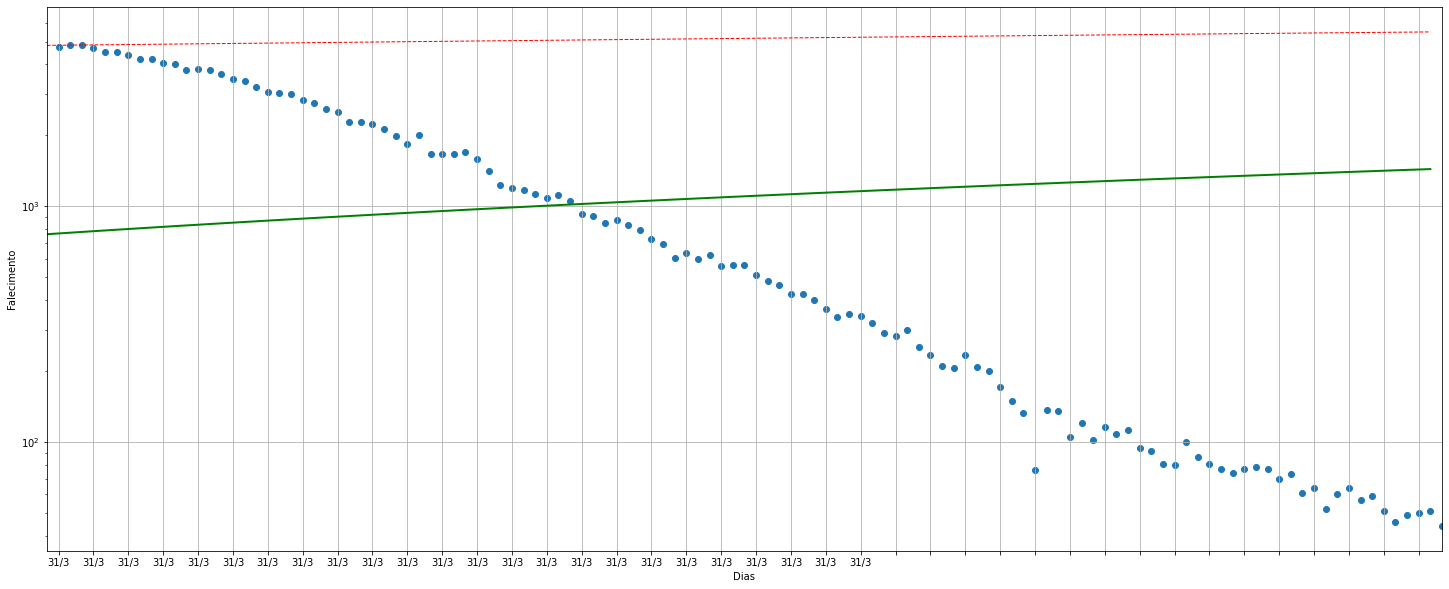

In [76]:
# Gráfico com as informações da Regressão Linear e com o Erro máximo e mínimo gerado pelo modelo
fig, ax = plt.subplots(figsize=(25, 10))
plt.grid()
plt.scatter(X, y)
# Regressão Linear plotada no gráfico
plt.plot(X_test, y_pred_linear, color='green', linewidth=2)
# Erro máximo plotado no gráfico
plt.plot(X_test, y_pred_max, color='red', linewidth=1,linestyle='dashed')
# Erro mínimo plotado no gráfico
plt.plot(X_test, y_pred_min, color='red', linewidth=1,linestyle='dashed')
plt.xlabel('Dias')
plt.xlim(starting_date, starting_date + future_days)
plt.xticks(x_ticks, date_prev)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
plt.ylabel('Falecimento')
plt.yscale("log")
print (y_pred_max)
plt.show()